In [1]:
import numpy as np
from tqdm import tqdm
import json
import umap
import matplotlib
import matplotlib.pyplot as plt

In [2]:
with open('..\Justin\Stroke_Notes_13OCT21\cui_vectors_15_NOV_2021.json','r') as infile:
    cuivectors = json.load(infile)

cuiids = list(cuivectors.keys())
cuiarray = np.asarray([cuivectors[x] for x in cuiids])
vocab = {cuiids[i]: i for i in range(len(cuiids))}
print(cuiarray.shape)

(111303, 100)


In [4]:
# umap cui vectors
reducer = umap.UMAP()
embedding = reducer.fit_transform(cuiarray)

H:\AppData\anaconda\envs\ahrq\lib\site-packages\numba\np\ufunc\parallel.py:366: NumbaWarning: The TBB threading layer requires TBB version 2021 update 1 or later i.e., TBB_INTERFACE_VERSION >= 12010. Found TBB_INTERFACE_VERSION = 11004. The TBB threading layer is disabled.
  warnings.warn(problem)


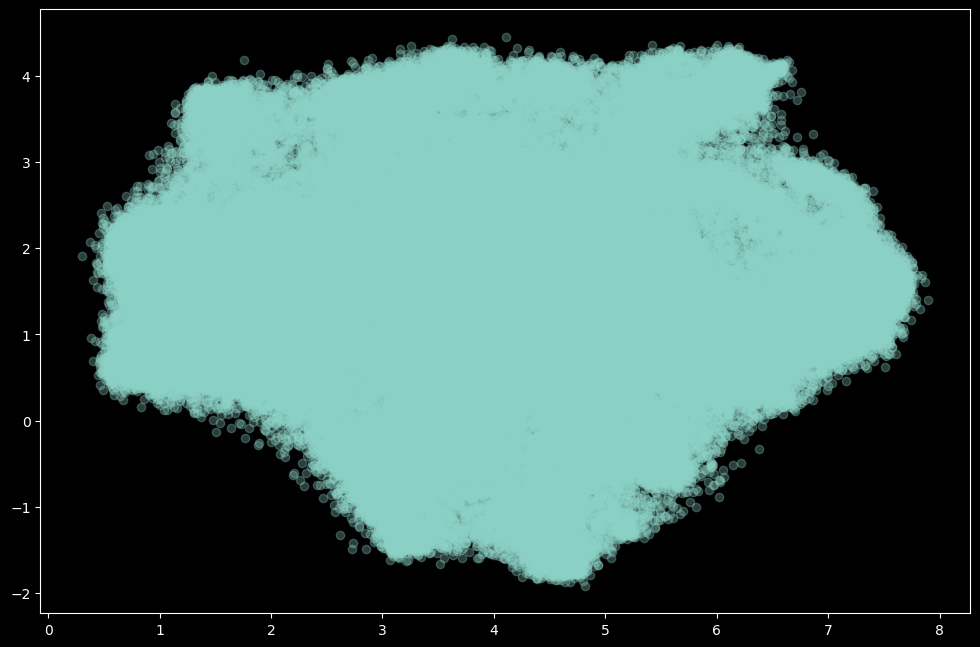

In [5]:
# plot and see what happens
plt.style.use("dark_background")
    
fig = plt.figure(figsize=(12,8), dpi=100)
plt.scatter(embedding[:, 0], embedding[:, 1], alpha=0.3)
plt.show()

In [3]:
with open('..\Justin\Stroke_Notes_13OCT21\sids_to_clamp_cuis.json','r') as infile:
    cuidata = json.load(infile)

In [14]:
# create document vectors from umapped cui vectors

docvectors = np.zeros((len(cuidata), 2))
for i,doc in tqdm(enumerate(cuidata), total=len(cuidata)):
    for cui in cuidata[doc]['cuis']:
        docvectors[i] += embedding[vocab[cui]]

100%|██████████████████████████████████| 29865/29865 [00:14<00:00, 2052.72it/s]


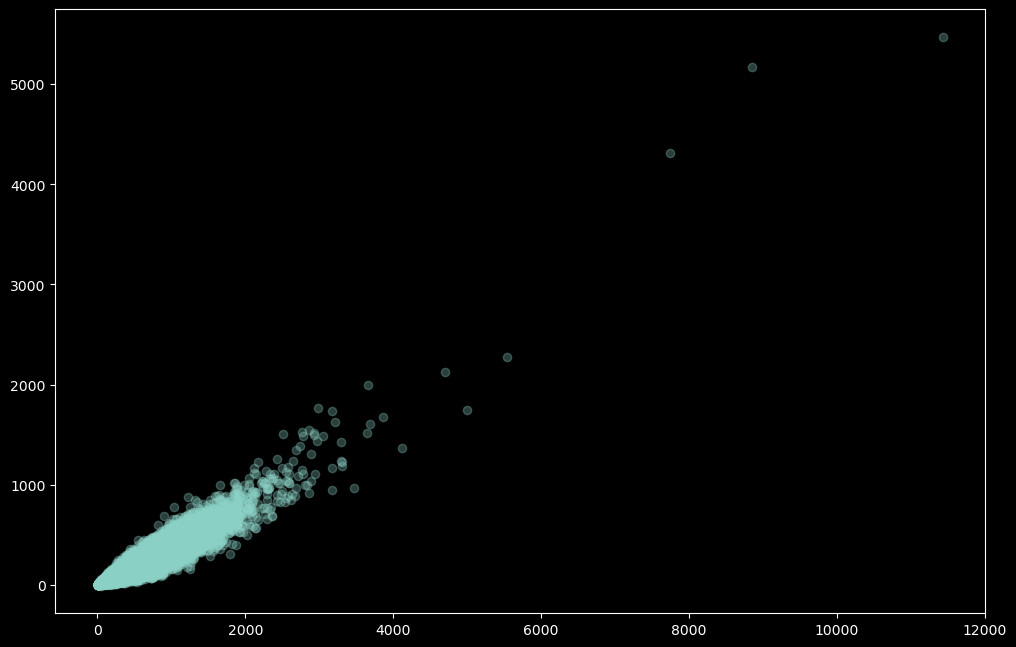

In [15]:
plt.style.use("dark_background")
    
fig = plt.figure(figsize=(12,8), dpi=100)
plt.scatter(docvectors[:, 0], docvectors[:, 1], alpha=0.3)
plt.show()

In [16]:
normalized_docvectors = np.zeros((len(cuidata), 2))
for i,doc in tqdm(enumerate(cuidata), total=len(cuidata)):
    for cui in cuidata[doc]['cuis']:
        normalized_docvectors[i] += embedding[vocab[cui]]
    normalized_docvectors[i] /= len(cuidata[doc]['cuis'])
    

100%|██████████████████████████████████| 29865/29865 [00:14<00:00, 2015.59it/s]


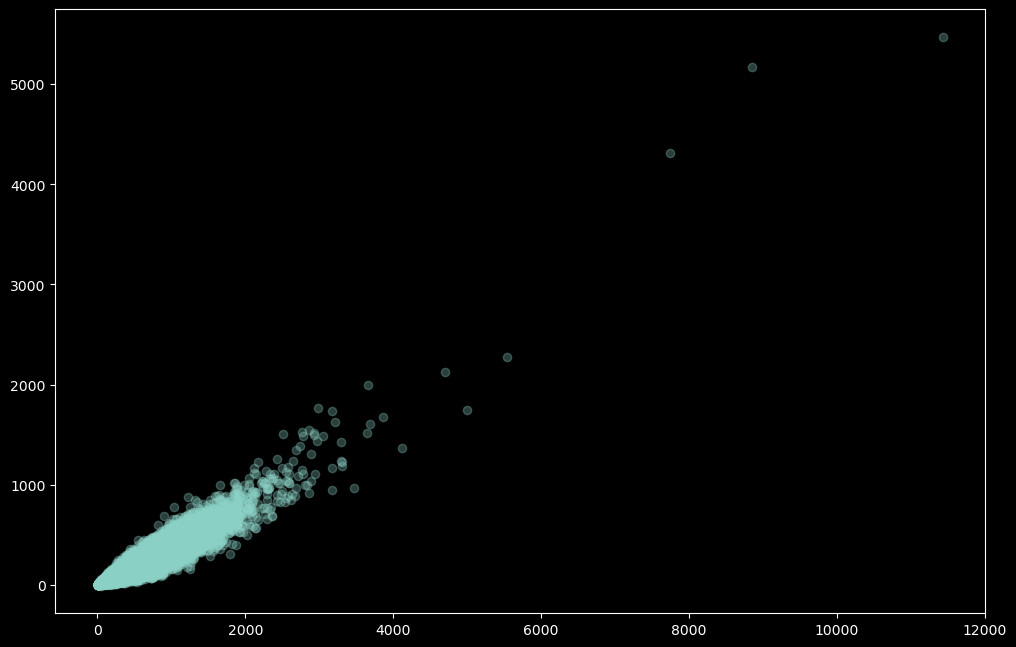

In [17]:
plt.style.use("dark_background")
    
fig = plt.figure(figsize=(12,8), dpi=100)
plt.scatter(docvectors[:, 0], docvectors[:, 1], alpha=0.3)
plt.show()

In [18]:
orig_docvectors = np.zeros((len(cuidata), cuiarray.shape[1]))
for i,doc in tqdm(enumerate(cuidata), total=len(cuidata)):
    for cui in cuidata[doc]['cuis']:
        orig_docvectors[i] += cuiarray[vocab[cui]]


100%|██████████████████████████████████| 29865/29865 [00:13<00:00, 2232.23it/s]


In [19]:
reducer2 = umap.UMAP()
embedding2 = reducer.fit_transform(orig_docvectors)

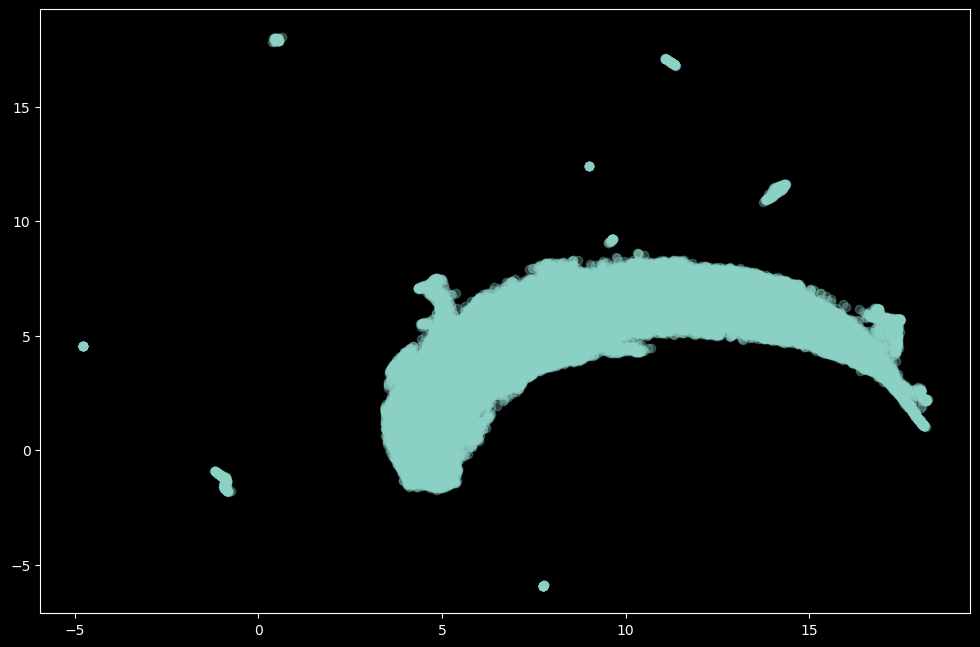

In [20]:
plt.style.use("dark_background")
    
fig = plt.figure(figsize=(12,8), dpi=100)
plt.scatter(embedding2[:, 0], embedding2[:, 1], alpha=0.3)
plt.show()

In [4]:
orig_doc_norm = np.zeros((len(cuidata), cuiarray.shape[1]))
for i,doc in tqdm(enumerate(cuidata), total=len(cuidata)):
    for cui in cuidata[doc]['cuis']:
        orig_doc_norm[i] += cuiarray[vocab[cui]]
    orig_doc_norm[i] /= len(cuidata[doc]['cuis'])

100%|██████████████████████████████████████████████████████████████████████████| 29865/29865 [00:23<00:00, 1246.64it/s]


In [6]:
reducer3 = umap.UMAP()
embedding3 = reducer3.fit_transform(orig_doc_norm)

C:\Users\VHAHOUYuM\AppData\Local\Continuum\anaconda3\envs\ahrq\lib\site-packages\numba\np\ufunc\parallel.py:366: NumbaWarning: The TBB threading layer requires TBB version 2021 update 1 or later i.e., TBB_INTERFACE_VERSION >= 12010. Found TBB_INTERFACE_VERSION = 11004. The TBB threading layer is disabled.
  warnings.warn(problem)


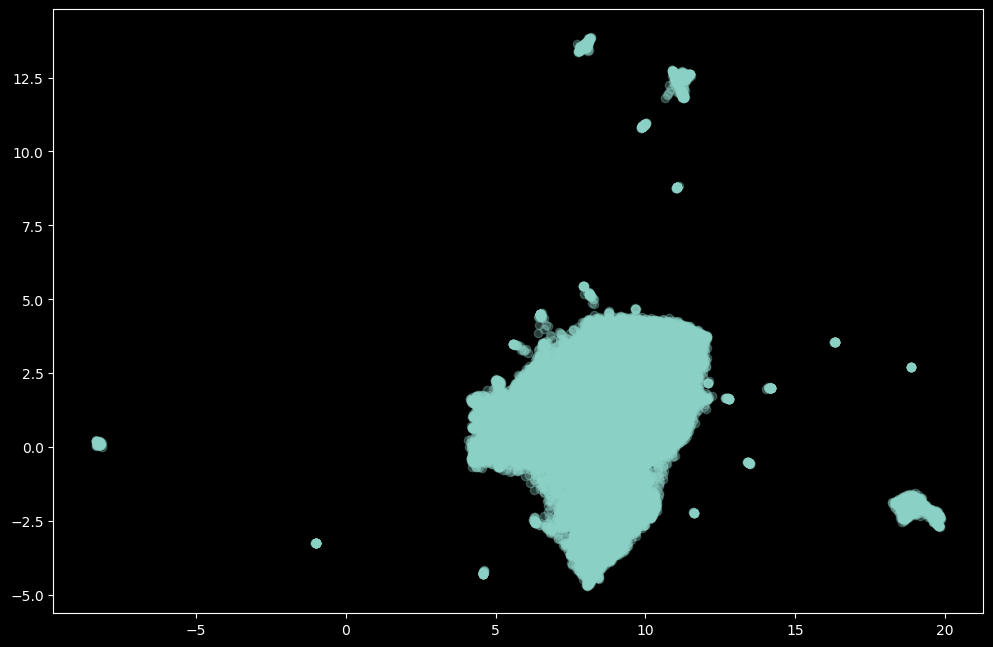

In [7]:
plt.style.use("dark_background")
    
fig = plt.figure(figsize=(12,8), dpi=100)
plt.scatter(embedding3[:, 0], embedding3[:, 1], alpha=0.3)
plt.show()

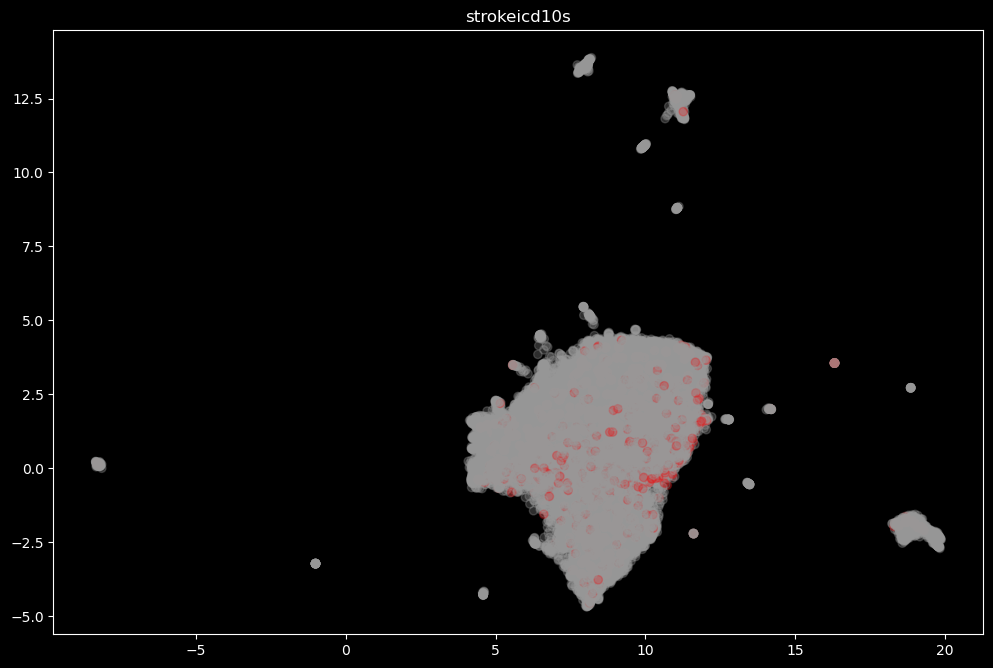

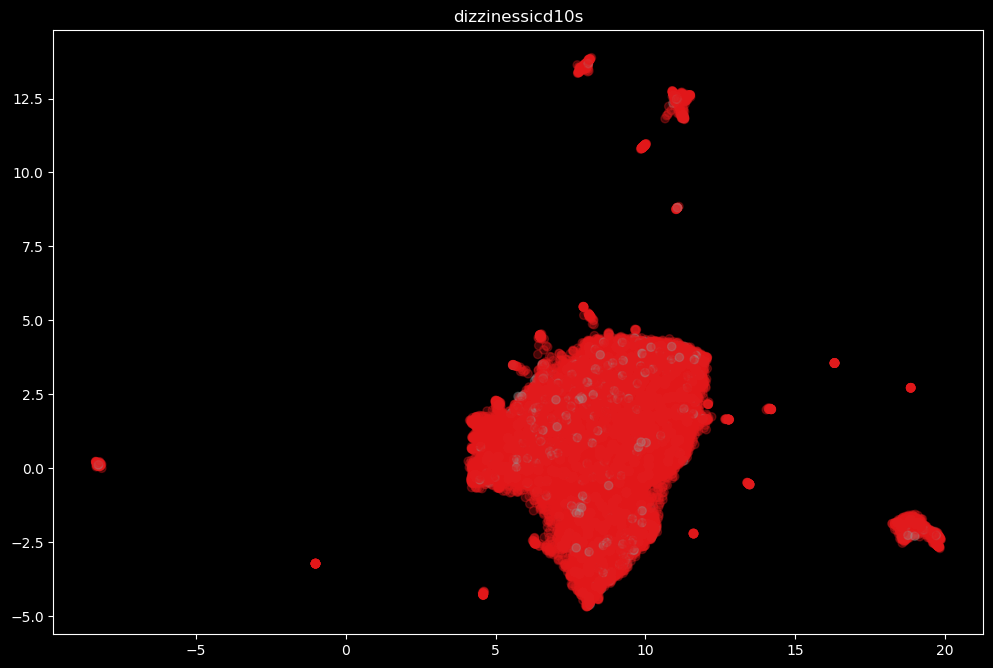

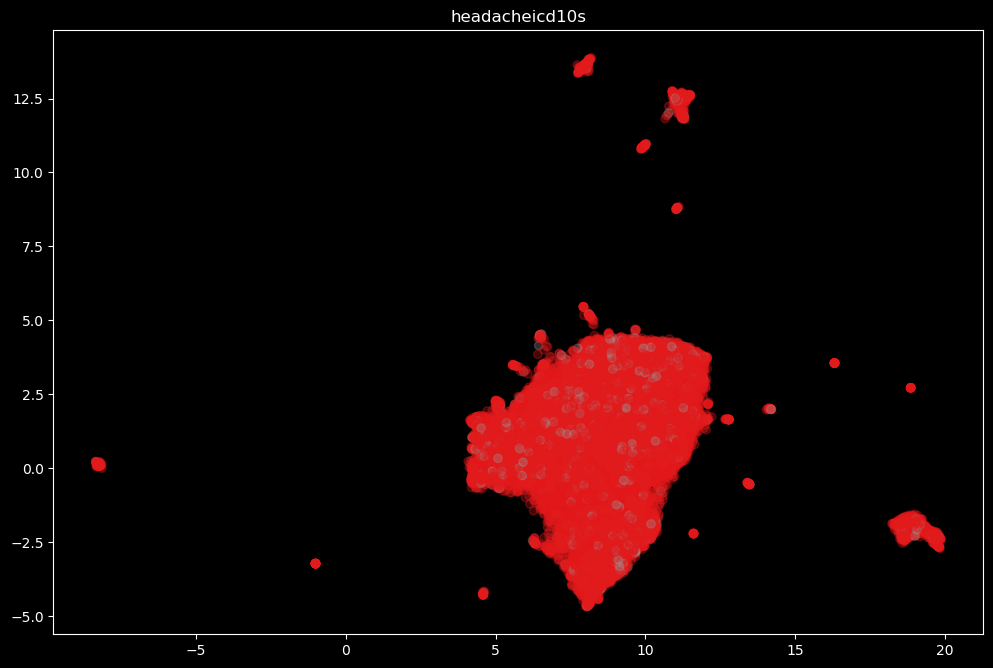

In [8]:
import umapplot
umapplot.plot_highlights(cuidata, embedding3)

In [ ]:
section_ind = np.argwhere((-5 < embedding3[:,0]) & (0 > embedding3[:,0]) & (0 < embedding3[:,1]) & (embedding3[:,1] < 10)).flatten()
idx2id = list(enumerate(cuidata))
selected_docids = []
for i in section_ind:
    selected_docids.append(idx2id[i][1])
print(len(selected_docids), selected_docids[:20]) # many are not strokes!!

In [ ]:
section_ind = np.argwhere((7.5 < embedding3[:,0]) & (8 > embedding3[:,0]) & (4 < embedding3[:,1]) & (embedding3[:,1] < 6)).flatten()
idx2id = list(enumerate(cuidata))
selected_docids = []
for i in section_ind:
    selected_docids.append(idx2id[i][1])
print(len(selected_docids), selected_docids[:20])

In [40]:
# save outliers of the west chunk
section_ind = np.argwhere((-5 < embedding3[:,0]) & (0 > embedding3[:,0]) & (0 < embedding3[:,1]) & (embedding3[:,1] < 10)).flatten()
idx2id = list(enumerate(cuidata))
selected_docids = dict()
for i in section_ind:
    selected_docids[idx2id[i][1]] = list(np.float64(embedding3[i]))


with open("normalized_doc_vector_westoutliers.json", "w") as outfile:
    json.dump(selected_docids, outfile)

In [43]:
# save outliers of the north chunk
section_ind = np.argwhere((0 < embedding3[:,0]) & (10 > embedding3[:,0]) & (embedding3[:,1] > 10)).flatten()
idx2id = list(enumerate(cuidata))
selected_docids = dict()
for i in section_ind:
    selected_docids[idx2id[i][1]] = list(np.float64(embedding3[i]))


with open("normalized_doc_vector_northoutliers.json", "w") as outfile:
    json.dump(selected_docids, outfile)

In [42]:
#save umap embedding results. (normalized by dividing by length)
umapped_doc = dict()
for i in range(embedding3.shape[0]):
    umapped_doc[idx2id[i][1]] = list(np.float64(embedding3[i]))
with open("normalized_doc_vector.json", "w") as outfile:
    json.dump(umapped_doc, outfile)

# Only present cuis and cui trained from all

In [3]:
with open("sids_to_present_cuis.json",'r') as infile:
    cuidata = json.load(infile)

In [5]:
present_doc_norm = np.zeros((len(cuidata), cuiarray.shape[1]))
for i,doc in tqdm(enumerate(cuidata), total=len(cuidata)):
    if len(cuidata[doc]['cuis']) == 0:
        print("doc has no present cuis:", doc)
        continue
    for cui in cuidata[doc]['cuis']:
        present_doc_norm[i] += cuiarray[vocab[cui]]
    present_doc_norm[i] /= len(cuidata[doc]['cuis'])

  2%|█▏                                                                          | 468/29865 [00:00<00:20, 1461.75it/s]

doc has no present cuis: 1000866475304


  8%|█████▋                                                                     | 2245/29865 [00:01<00:21, 1265.48it/s]

doc has no present cuis: 1000902924496


 11%|███████▉                                                                   | 3155/29865 [00:02<00:15, 1669.47it/s]

doc has no present cuis: 1000920278073


 31%|██████████████████████▉                                                    | 9111/29865 [00:05<00:11, 1739.06it/s]

doc has no present cuis: 1001037237996


 33%|█████████████████████████                                                  | 9990/29865 [00:06<00:12, 1626.05it/s]

doc has no present cuis: 1201142915600


100%|██████████████████████████████████████████████████████████████████████████| 29865/29865 [00:20<00:00, 1464.13it/s]


In [7]:
reducer4 = umap.UMAP()
embedding4 = reducer4.fit_transform(present_doc_norm)

C:\Users\VHAHOUYuM\AppData\Local\Continuum\anaconda3\envs\ahrq\lib\site-packages\numba\np\ufunc\parallel.py:366: NumbaWarning: The TBB threading layer requires TBB version 2021 update 1 or later i.e., TBB_INTERFACE_VERSION >= 12010. Found TBB_INTERFACE_VERSION = 11004. The TBB threading layer is disabled.
  warnings.warn(problem)


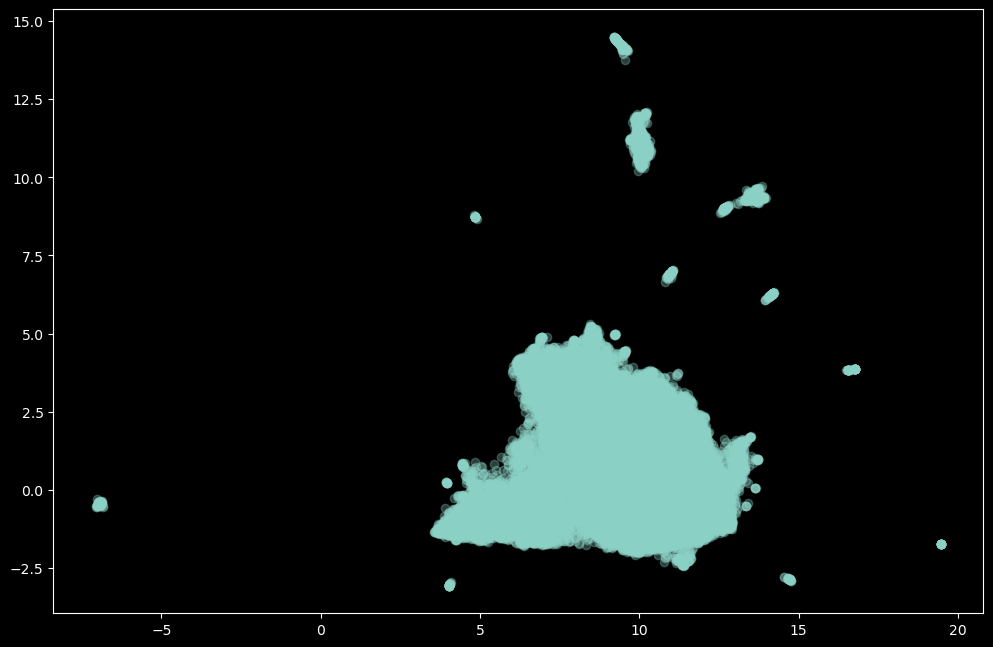

In [8]:
plt.style.use("dark_background")
    
fig = plt.figure(figsize=(12,8), dpi=100)
plt.scatter(embedding4[:, 0], embedding4[:, 1], alpha=0.3)
plt.show()